In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris_data.csv',header=None)
df.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
X=df.drop('Species',axis=1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#standardise data
from sklearn.preprocessing import StandardScaler as ss
X=ss().fit_transform(X)

In [6]:
#covariance matrix=X(transpose).X
X_co=(1/50)*X.T.dot(X)
X_co

array([[ 3.        , -0.32810775,  2.61526247,  2.4538609 ],
       [-0.32810775,  3.        , -1.26154829, -1.06963227],
       [ 2.61526247, -1.26154829,  3.        ,  2.88827129],
       [ 2.4538609 , -1.06963227,  2.88827129,  3.        ]])

In [7]:
# singular value decomposition
eig_vectors,eig_values,v=np.linalg.svd(X_co)
eig_values

array([8.73245425, 2.76366279, 0.44205983, 0.06182312])

In [8]:
eig_vectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [9]:
variance=(eig_values/sum(eig_values))*100
print("Variance of each feature-->",variance)

Variance of each feature--> [72.77045209 23.03052327  3.68383196  0.51519268]


In [10]:
pc1=X.dot(eig_vectors.T[0])
pc2=X.dot(eig_vectors.T[1])
res=pd.DataFrame(pc1,columns=["pc1"])
res["pc2"]=pc2
res['target']=list(df["Species"])
res.head()

,pc1,pc2,target
0,2.264542,-0.505704,1
1,2.086426,0.655405,1
2,2.367950,0.318477,1
3,2.304197,0.575368,1
4,2.388777,-0.674767,1


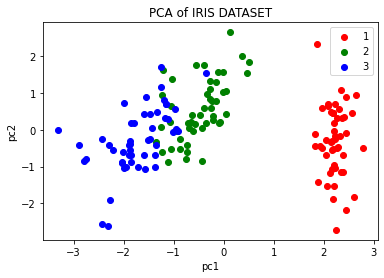

In [11]:
plt.figure()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("PCA of IRIS DATASET")
targets=[1,2,3]
colors=['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep=res['target'] == target
    plt.scatter(res.loc[indicesToKeep,'pc1'],res.loc[indicesToKeep,'pc2'],c=color)
    
plt.legend(targets)
plt.show()